In [ ]:
!git clone https://github.com/ealeongomez/Time-Series-Forecasting-Using-the-Bayesian-Approach-and-Random-Fourier-Features.git

fatal: destination path 'Time-Series-Forecasting-Using-the-Bayesian-Approach-and-Random-Fourier-Features' already exists and is not an empty directory.


In [ ]:
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
def Friedman_Test(matriz):
    """
        Input:
            matriz:  (4, 5)
                - 4: performance (MSE, RMSE, MAE, R2)
                - 5: model (Conv1D, RFF-Conv1D-FF, RFF-Conv1D-FT, RFF-Conv1D-TF, RFF-Conv1D-TT)

                example:
                     _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
                    |       | Conv1D |   RFF-Conv1D-FF  | RFF-Conv1D-FT | RFF-Conv1D-TF | RFF-Conv1D-TT |
                    |_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _|
                    |  MSE  |   a    |        b         |     c         |      d        |       e       |
                    |  RMSE |   a    |        b         |     c         |      d        |       e       |
                    |  MAE  |   a    |        b         |     c         |      d        |       e       |
                    |  R2   |   a    |        b         |     c         |      d        |       e       |
                    | _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ |
        Output:
            Ranking of matriz
    """

    matriz_rankeada = np.argsort(np.argsort(matriz, axis=1), axis=1) + 1
    end_row_rankeada = 6 - matriz_rankeada[-1]
    matriz_rankeada[-1] = end_row_rankeada

    return matriz_rankeada

In [ ]:
location = "/content/Time-Series-Forecasting-Using-the-Bayesian-Approach-and-Random-Fourier-Features/Experiments/"

# Changue *.pkl
with open('{location}/results_proof4.pkl'.format(location=location), 'rb') as f:
    data = pickle.load(f)

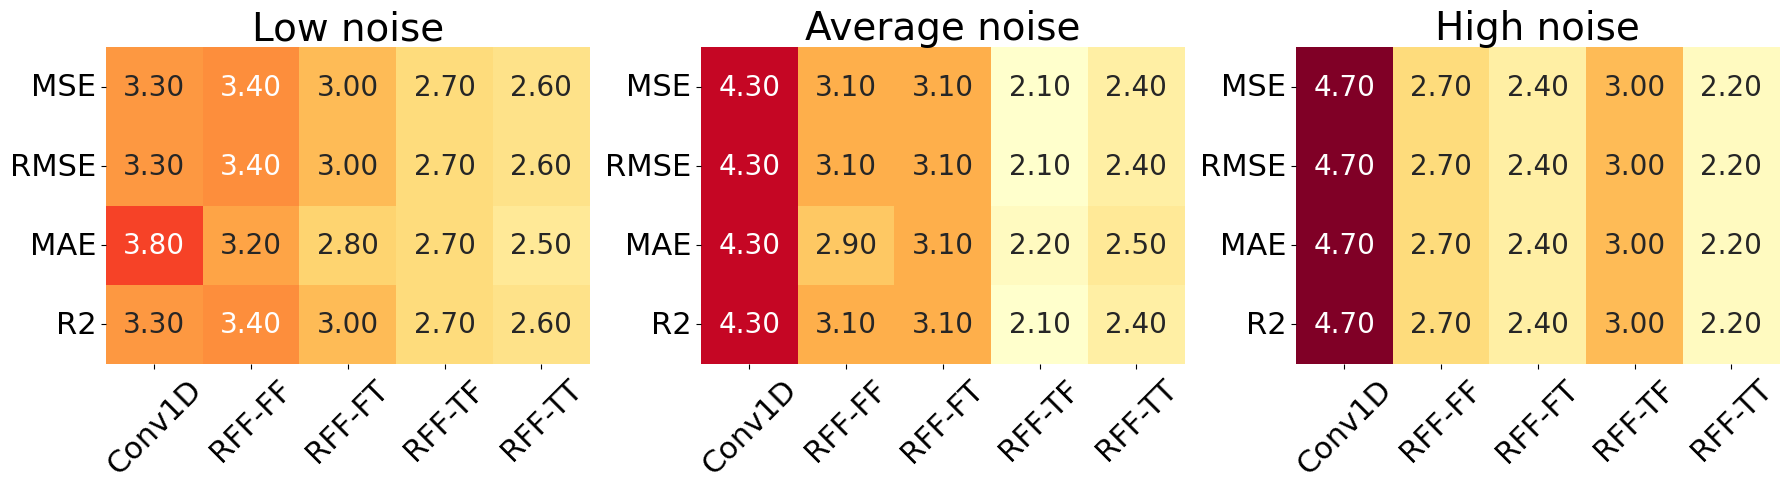

In [ ]:
performanceMetrics = 4
model = 5
count = 1
names = ['Low noise', 'Average noise', 'High noise']

results = []
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # Configuración para las subgráficas

# Crear un rango común para el colorbar basado en los datos de todas las gráficas
vmin, vmax = float('inf'), float('-inf')
for serie in data.keys():
    matriz_rankeada = np.zeros((10, 4, 5))
    for i in range(data[str(serie)].shape[0]):
        matriz = data[str(serie)][i]
        value = Friedman_Test(matriz)
        matriz_rankeada[i, :, :] = value
    nueva_matriz = np.mean(matriz_rankeada, axis=0)
    results.append(matriz_rankeada)
    vmin = min(vmin, nueva_matriz.min())
    vmax = max(vmax, nueva_matriz.max())

# Graficar cada heatmap sin colorbar y utilizar el rango común vmin, vmax
for ax, serie, name in zip(axs, data.keys(), names):
    matriz_rankeada = np.zeros((10, 4, 5))
    for i in range(data[str(serie)].shape[0]):
        matriz = data[str(serie)][i]
        value = Friedman_Test(matriz)
        matriz_rankeada[i, :, :] = value

    nueva_matriz = np.mean(matriz_rankeada, axis=0)
    sns.heatmap(nueva_matriz, annot=True, cmap='YlOrRd', fmt='.2f',
                annot_kws={"size": 20}, ax=ax, cbar=False, vmin=vmin, vmax=vmax)

    ax.set_title(name, fontsize=28)
    ax.set_xticks(np.arange(5) + 0.5)
    ax.set_xticklabels(['Conv1D', 'RFF-FF', 'RFF-FT', 'RFF-TF', 'RFF-TT'], rotation=45, fontsize=22)
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels(['MSE', 'RMSE', 'MAE', 'R2'], va="center", rotation=0, fontsize=22)

# Crear una barra de color compartida para todas las subgráficas
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Ajuste de la posición y tamaño de la barra de color
#norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
#cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='YlOrRd'), cax=cbar_ax)
#cbar.ax.tick_params(labelsize=22)  # Tamaño de los valores en la barra de color
#cbar.set_label("Promedio", fontsize=24)  # Etiqueta de la barra de color

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar para dar espacio al colorbar
plt.show()


Serie 1 Low noise
Serie 2 Average noise
Serie 3 High noise


<ipython-input-56-32bb234c17fe>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,count)


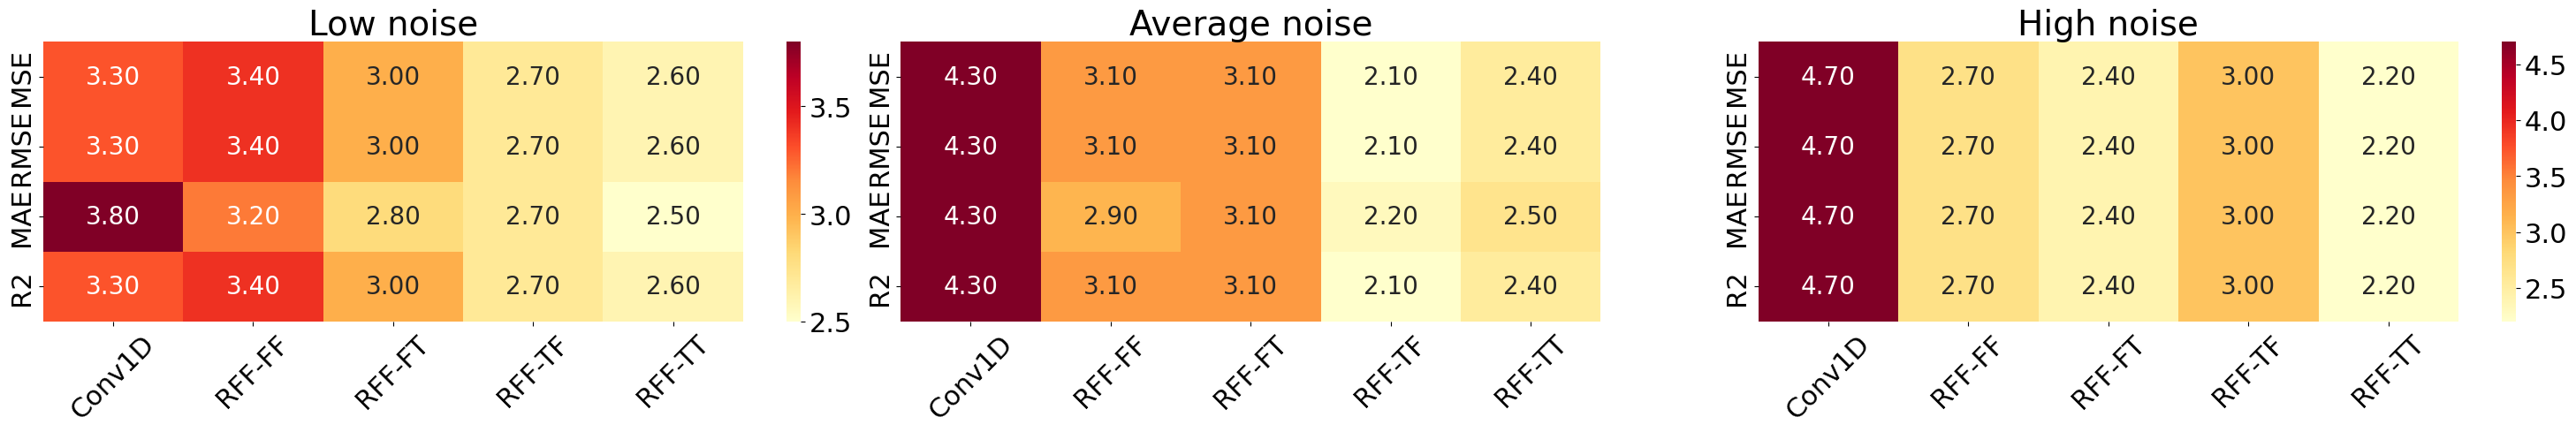

In [ ]:
performanceMetrics = 4
model = 5
count = 1
names = ['Low noise', 'Average noise', 'High noise']

results = []
plt.figure(figsize=(30,5))
for serie, name in zip(data.keys(), names) :
    print(serie, name)
    matriz_rankeada = np.zeros((10,4,5))

    # Trials
    for i in range(data[str(serie)].shape[0]):
        matriz = data[str(serie)][i]
        value = Friedman_Test(matriz)
        matriz_rankeada[i,:,:] = value

    nueva_matriz = np.mean(matriz_rankeada, axis=0)

    plt.subplot(1,3,count)
    #plt.figure(figsize=(8, 6))
    #heatmap = sns.heatmap(nueva_matriz, annot=True, cmap='YlOrRd', fmt='.2f') #, cbar_kws={'label': 'Promedio'})
    heatmap = sns.heatmap(nueva_matriz, annot=True, cmap='YlOrRd', fmt='.2f',
                          annot_kws={"size": 20})  # Tamaño de los números en el heatmap

    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=22)  # Tamaño de los valores en la barra de color
    #cbar.set_label("Promedio", fontsize=18)  # Tamaño de la etiqueta de la barra de color


    #plt.xlabel('Models', fontsize=15)
    #plt.ylabel('Metrics', fontsize=15)
    plt.title(name, fontsize=28)
    plt.tight_layout()
    plt.xticks(np.arange(5)+0.5, ('Conv1D', 'RFF-FF', 'RFF-FT', 'RFF-TF', 'RFF-TT'), rotation=45, fontsize=22)
    plt.yticks(np.arange(4)+0.5, ('MSE', 'RMSE', 'MAE', 'R2'), va="center", fontsize=22)
    count += 1

    #matriz_rankeada
    results.append(matriz_rankeada)

plt.show()


Serie 1 Low noise


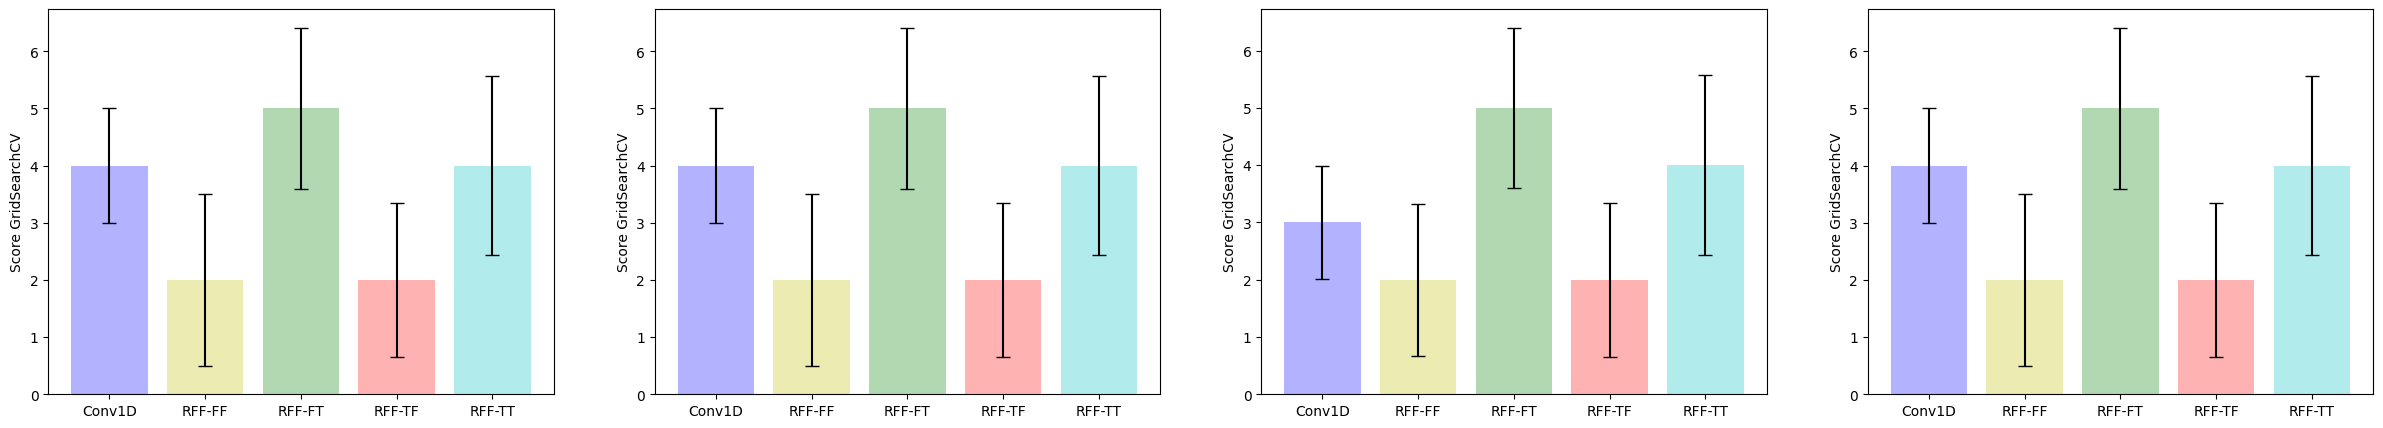

Serie 2 Average noise


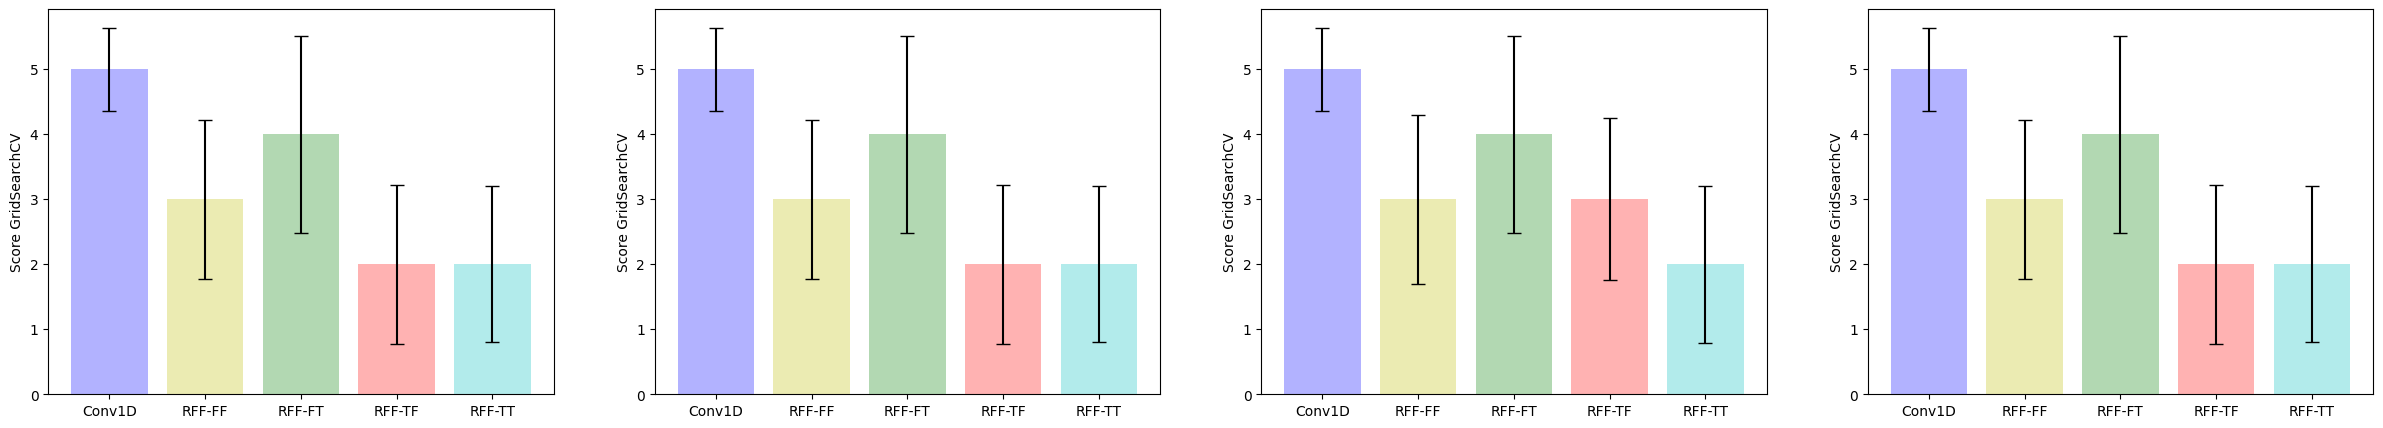

Serie 3 High noise


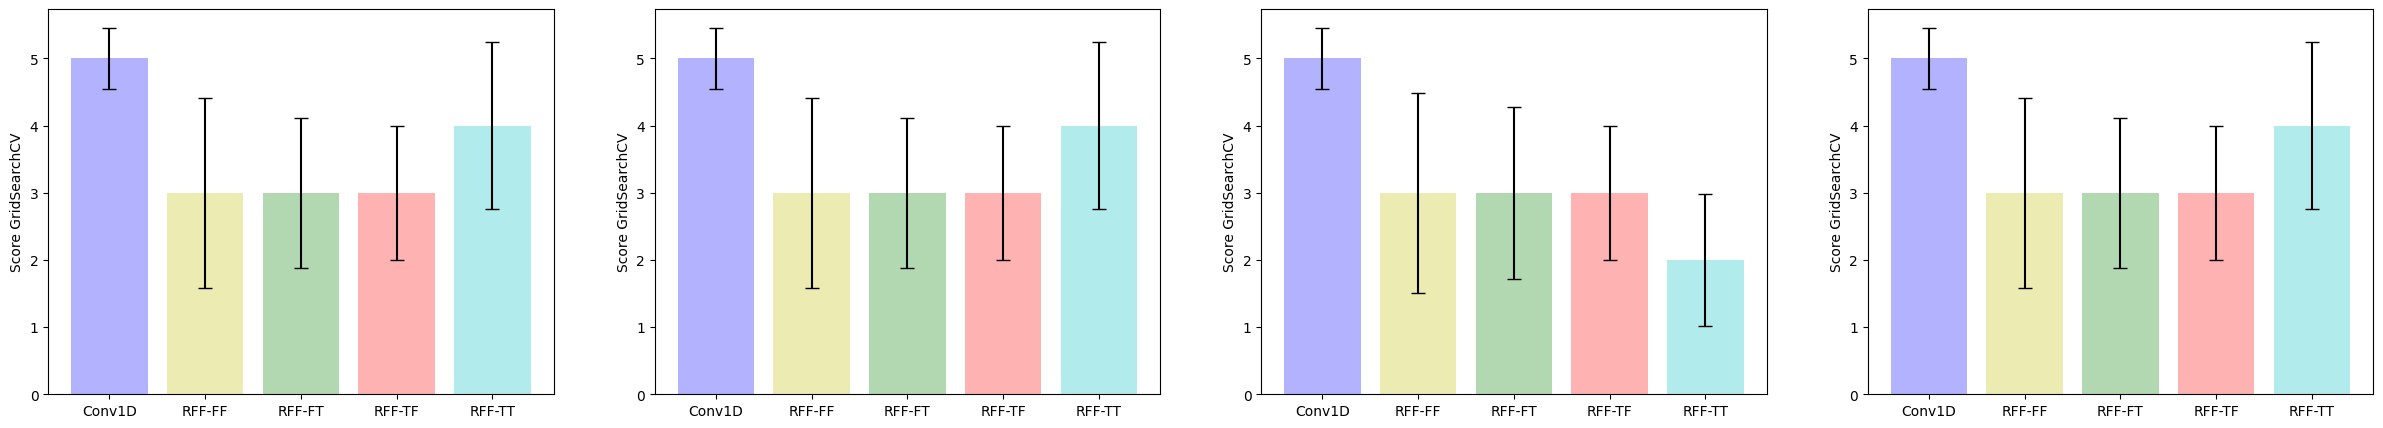

In [ ]:
colors = ['b', 'y', 'g', 'r', 'c']
# Serie
for serie, name in zip(range(len(results)), names):
    print("Serie {}".format(serie+1), name)

    matriz = results[serie]

    plt.figure(figsize=(30,5))
    # Performace: MSE, RMSE, MAE, R2
    flag = 1
    for metric in range(matriz.shape[1]):
        bars_ = np.zeros((2, matriz.shape[2]))

        for i in range(matriz.shape[2]):
            # Se determina el mejor score de clasificación
            # Trial, MSE=0, model

            if i != matriz.shape[2]:
                ind = matriz[:,metric,i].argmin() - 1
            else:
                ind = matriz[:,metric,i].argmax() - 1

            value_betterModel = matriz[ind,metric,i]
            std = np.std(matriz[:, metric, i])

            bars_[0,i] = value_betterModel # Guardar score promedio del mejor modelo
            bars_[1,i] = std               # Guardar std del mejor modelo

        plt.subplot(1,matriz.shape[1],flag)
        try:
            plt.bar(np.arange(matriz.shape[2]), bars_[0], yerr=bars_[1], align='center', alpha=0.3, ecolor='black', capsize=5, color=colors)
        except:
          print("Something else went wrong")
          plt.bar(np.arange(matriz.shape[2]), np.zeros((2, matriz.shape[2]))[0], yerr=np.zeros((2, matriz.shape[2]))[1], align='center', alpha=0.3, ecolor='black', capsize=5, color=colors)


        plt.ylabel('Score GridSearchCV')
        plt.xticks(np.arange(matriz.shape[2]))
        plt.gca().set_xticklabels(['Conv1D', 'RFF-FF', 'RFF-FT', 'RFF-TF', 'RFF-TT'])
        flag += 1

    plt.show()

